In [2]:
import pandas as pd

In [3]:
file_path = "./농림축산식품부_양곡자급률_20231231.csv"

df = pd.read_csv(file_path, encoding="cp949")

# 상위 10개 행 출력
df.head(10)

,연도,전 체,쌀,보리쌀,밀,옥수수,콩,서 류,기 타
0,1957,86.3,92.3,91.1,26.2,26.2,108.5,117.3,101.9
1,1958,85.8,99.4,76.5,22.1,20.3,96.2,117.6,101.9
2,1959,100.4,100.4,124.7,40.5,41.2,97.5,117.9,101.5
3,1960,98.6,100.8,120.1,35.3,50.0,92.6,113.3,101.8
4,1961,94.9,98.5,92.6,41.8,56.0,98.5,117.6,101.9
5,1962,94.6,101.6,100.1,28.6,61.5,107.1,117.5,105.0
6,1963,78.9,96.1,71.0,14.5,26.5,106.1,117.7,86.7
7,1964,97.0,101.3,134.1,25.1,45.5,106.1,117.6,94.2
8,1965,98.8,100.7,117.8,27.8,77.8,108.7,117.6,101.5
9,1966,100.0,99.1,121.9,30.6,105.3,107.4,117.7,104.8


In [4]:
# 가장 최신 연도 데이터 확인 (최근 연도 기준)
latest_year_data = df.sort_values(by="연도", ascending=False).iloc[0]

# 필요한 품목별 자급률 추출
latest_year = latest_year_data['연도']
self_sufficiency_rates = {
    "쌀": latest_year_data["쌀"],
    "밀": latest_year_data["밀"],
    "콩": latest_year_data["콩"],
    "옥수수": latest_year_data["옥수수"]
}

latest_year, self_sufficiency_rates

(np.float64(2022.0),
 {'쌀': np.float64(104.8),
  '밀': np.float64(1.3),
  '콩': np.float64(28.6),
  '옥수수': np.float64(4.3)})

In [5]:
# 출처: 통계청 KOSIS 25.05.22 기준

## 인구 수
population = 51684564

## 1인당 하루 소비량 (kg)
daily_consumption_per_person = {
    "쌀": 0.2,
    "밀": 0.15,
    "콩": 0.05,
    "옥수수": 0.3
}

## 연간 총 소비량 (만 톤 기준, FAO 등 참조)
annual_consumption = {
    "쌀": 370,
    "밀": 444,
    "콩": 130,
    "옥수수": 1000
}

# 정부 비축량 (만 톤 기준, 보도자료 등 기반 추정)
stockpile = {
    "쌀": 45,
    "밀": 10,
    "콩": 5,
    "옥수수": 10
}

# 생존 가능 일수 계산
survival_days = {}

for grain in daily_consumption_per_person:
    daily_total_need_ton = population * daily_consumption_per_person[grain] / 1000  # 톤 단위
    available_ton = (annual_consumption[grain] * (self_sufficiency_rates[grain] / 100)) + stockpile[grain]
    survival_days[grain] = int((available_ton * 10000) / daily_total_need_ton)  # 만 톤 → 톤

survival_days


{'쌀': 418, '밀': 20, '콩': 163, '옥수수': 34}

In [6]:
# 전시 상황에서는 식량 절감을 고려하여 소비량 30% 감축
reduced_consumption = {k: v * 0.7 for k, v in daily_consumption_per_person.items()}

# 생존 가능 일수 재계산
reduced_survival_days = {}

for grain in reduced_consumption:
    daily_total_need_ton = population * reduced_consumption[grain] / 1000  # 톤 단위
    available_ton = (annual_consumption[grain] * (self_sufficiency_rates[grain] / 100)) + stockpile[grain]
    reduced_survival_days[grain] = int((available_ton * 10000) / daily_total_need_ton)  # 만 톤 → 톤

reduced_survival_days

{'쌀': 598, '밀': 29, '콩': 233, '옥수수': 48}

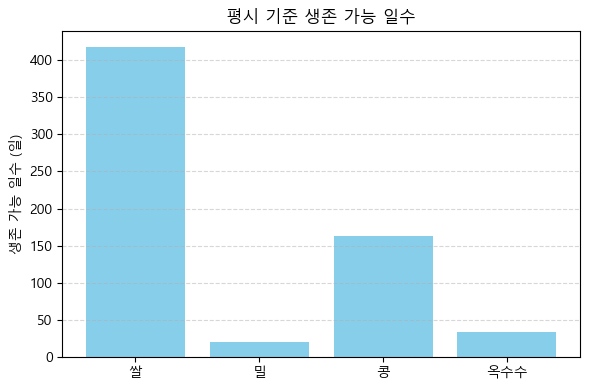

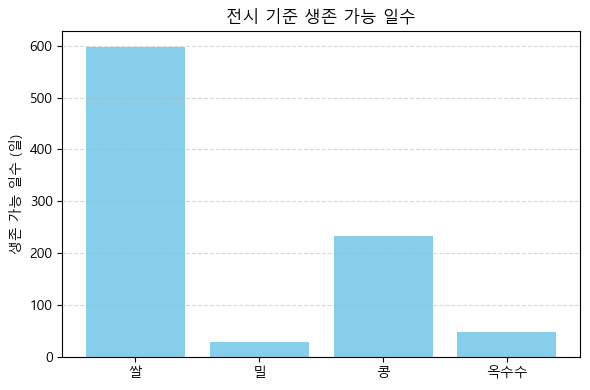

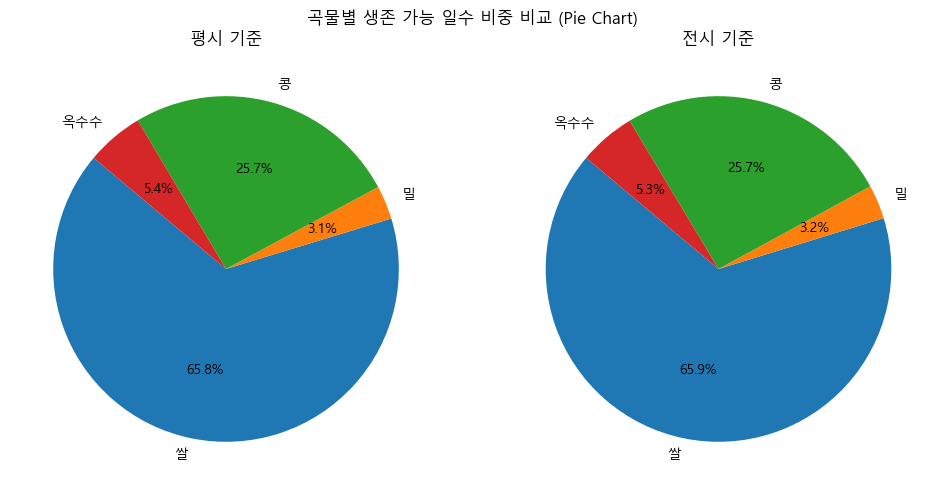

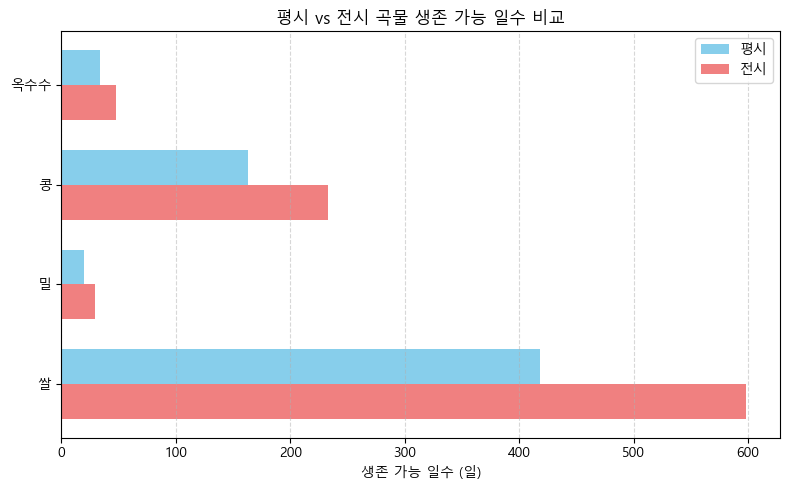

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# 기본 데이터 (정상 문자열로 수정)
survival_days_normal = survival_days
survival_days_wartime = reduced_survival_days

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 막대 그래프
def plot_bar(data, title):
    plt.figure(figsize=(6, 4))
    plt.bar(data.keys(), data.values(), color="skyblue")
    plt.ylabel("생존 가능 일수 (일)")
    plt.title(title)
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# 이중 막대 그래프 (수평)
def plot_combined_bar(normal, wartime):
    labels = list(normal.keys())
    x = range(len(labels))
    
    normal_values = list(normal.values())
    wartime_values = list(wartime.values())
    
    bar_height = 0.35

    plt.figure(figsize=(8, 5))
    plt.barh([i + bar_height for i in x], normal_values, height=bar_height, label='평시', color='skyblue')
    plt.barh(x, wartime_values, height=bar_height, label='전시', color='lightcoral')

    plt.xlabel("생존 가능 일수 (일)")
    plt.yticks([i + bar_height / 2 for i in x], labels)
    plt.title("평시 vs 전시 곡물 생존 가능 일수 비교")
    plt.legend()
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 원형 그래프
def plot_pie_comparison(normal, wartime):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].pie(normal.values(), labels=normal.keys(), autopct='%1.1f%%', startangle=140)
    axes[0].set_title("평시 기준")

    axes[1].pie(wartime.values(), labels=wartime.keys(), autopct='%1.1f%%', startangle=140)
    axes[1].set_title("전시 기준")

    plt.suptitle("곡물별 생존 가능 일수 비중 비교 (Pie Chart)")
    plt.tight_layout()
    plt.show()


# 시각화 실행
plot_bar(survival_days_normal, "평시 기준 생존 가능 일수")
plot_bar(survival_days_wartime, "전시 기준 생존 가능 일수")
plot_pie_comparison(survival_days_normal, survival_days_wartime)
plot_combined_bar(survival_days_normal, survival_days_wartime)